In [25]:
import warnings
warnings.filterwarnings("ignore")

# Importing Modules

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# Brief Review of Machine Learning

# Regression

In [3]:
X_all, y_all = datasets.make_regression(n_samples=50,n_features=50, n_informative=10)

In [5]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [6]:
model = linear_model.LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression()

In [8]:
def sse(resid):
    return np.sum(resid**2)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.6114976789599665e-24

In [9]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

411806.2021163749

In [10]:
model.score(X_train, y_train)

1.0

In [11]:
model.score(X_test, y_test)

0.5098587871585382

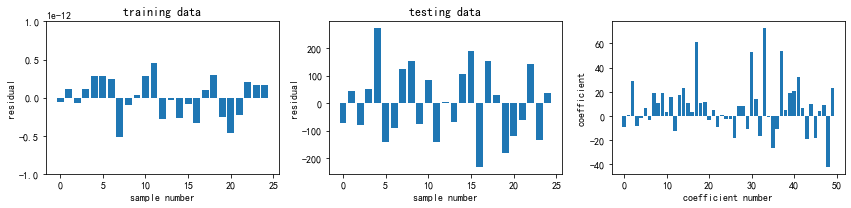

In [13]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes
fig, ax = plot_residuals_and_coeff(resid_train, resid_test,model.coef_)

In [14]:
model = linear_model.Ridge(alpha=2.5)

In [15]:
model.fit(X_train, y_train)

Ridge(alpha=2.5)

In [16]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

4240.913551041544

In [17]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

407196.09888355614

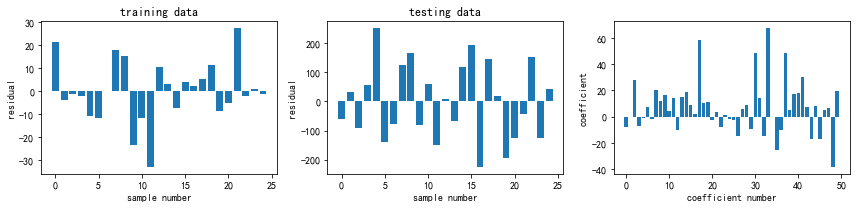

In [18]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test,model.coef_)

In [19]:
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)

Lasso()

In [20]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

327.2930209242399

In [21]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1894.186893003716

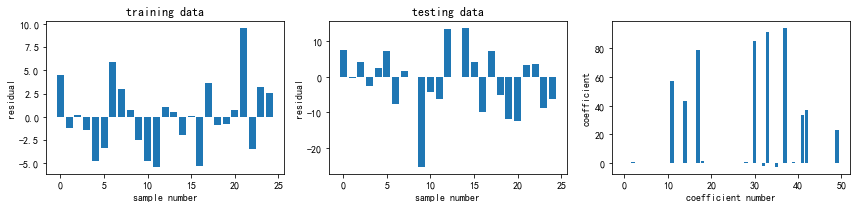

In [22]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test,model.coef_)

In [23]:
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

In [26]:
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = sse(y_train - model.predict(X_train))
    sse_test[n] = sse(y_test - model.predict(X_test))

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


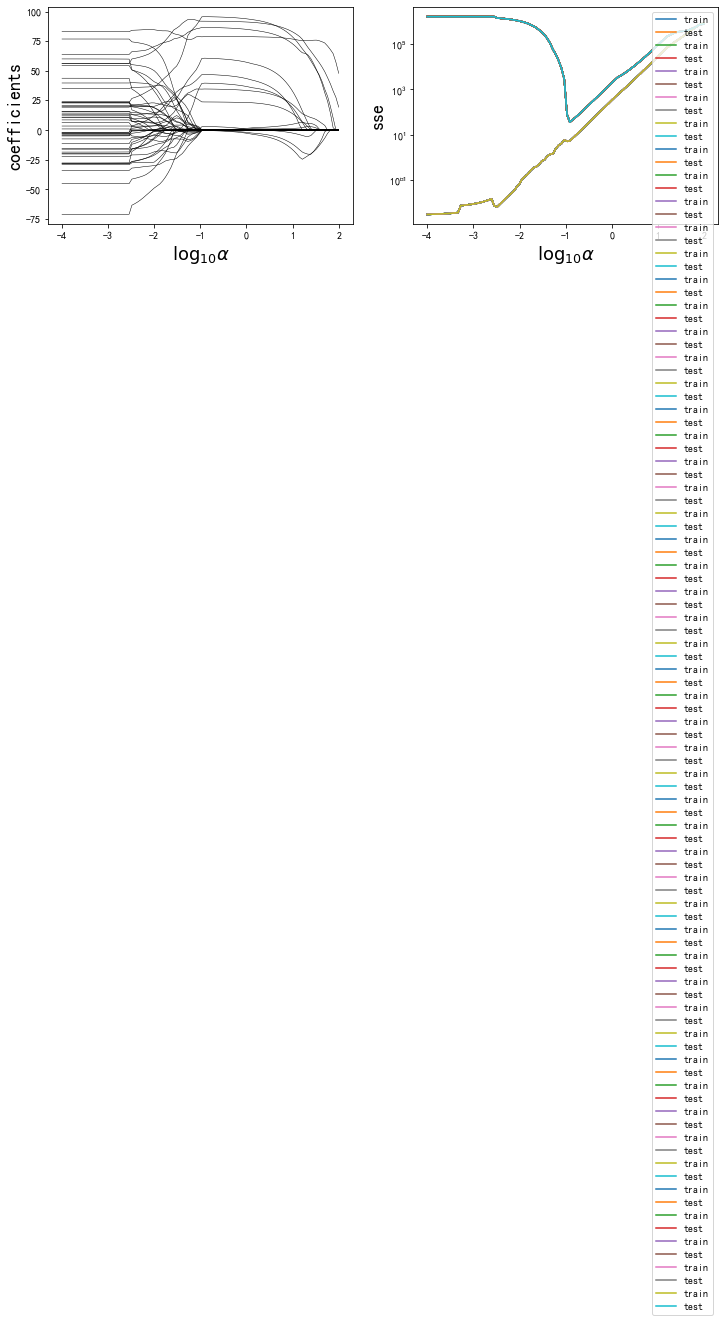

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)
    
    axes[1].semilogy(np.log10(alphas), sse_train, label="train")
    axes[1].semilogy(np.log10(alphas), sse_test, label="test")
    axes[1].legend(loc=0)

    axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
    axes[0].set_ylabel(r"coefficients", fontsize=18)
    axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
    axes[1].set_ylabel(r"sse", fontsize=18)

In [28]:
model = linear_model.LassoCV()
model.fit(X_all, y_all)

LassoCV()

In [29]:
model.alpha_

0.13342648335166646

In [30]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

7.021776387441289

In [31]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

3.5959073932645826

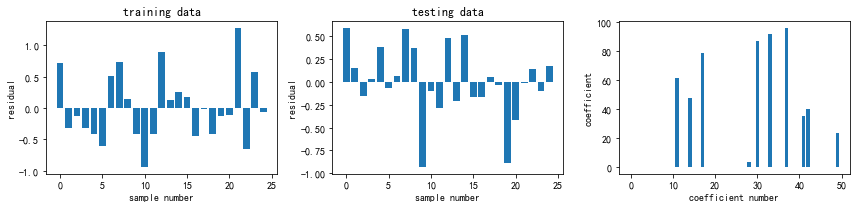

In [32]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test,model.coef_)

In [33]:
model = linear_model.ElasticNetCV()
model.fit(X_train, y_train)

ElasticNetCV()

In [34]:
model.alpha_

0.3221854535494321

In [35]:
model.l1_ratio

0.5

In [36]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

10408.300848280469

In [37]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

394813.3640321933

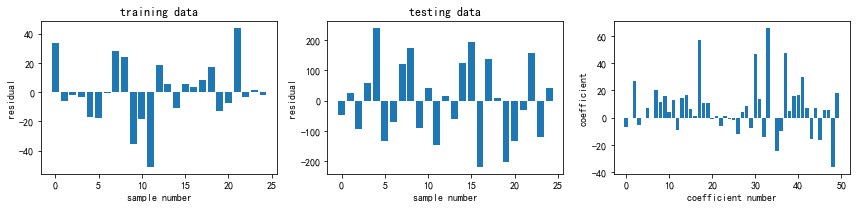

In [38]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test,model.coef_)

# Classification

In [39]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [42]:
iris.data.shape

(150, 4)

In [43]:
iris.target.shape

(150,)

In [44]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(iris.data, iris.target,train_size=0.7)

In [45]:
classifier = linear_model.LogisticRegression()

In [46]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_test_pred = classifier.predict(X_test)

In [48]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [49]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]], dtype=int64)

In [50]:
np.bincount(y_test)

array([15, 16, 14], dtype=int64)

In [52]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 13]], dtype=int64)

In [53]:
train_size_vec = np.linspace(0.1, 0.9, 30)

In [54]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier]

In [55]:
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)),dtype=float)

In [56]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(iris.data, iris.target,
                                     train_size=train_size)
    for m, Classifier in enumerate(classifiers):
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_p = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test,y_test_p).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

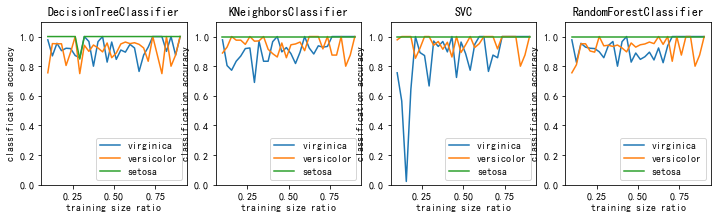

In [57]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))
for m, Classifier in enumerate(classifiers):
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

# Clustering

In [58]:
X, y = iris.data, iris.target

In [59]:
n_clusters = 3

In [60]:
clustering = cluster.KMeans(n_clusters=n_clusters)

In [61]:
clustering.fit(X)

KMeans(n_clusters=3)

In [62]:
y_pred = clustering.predict(X)

In [63]:
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [64]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [65]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [66]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]], dtype=int64)

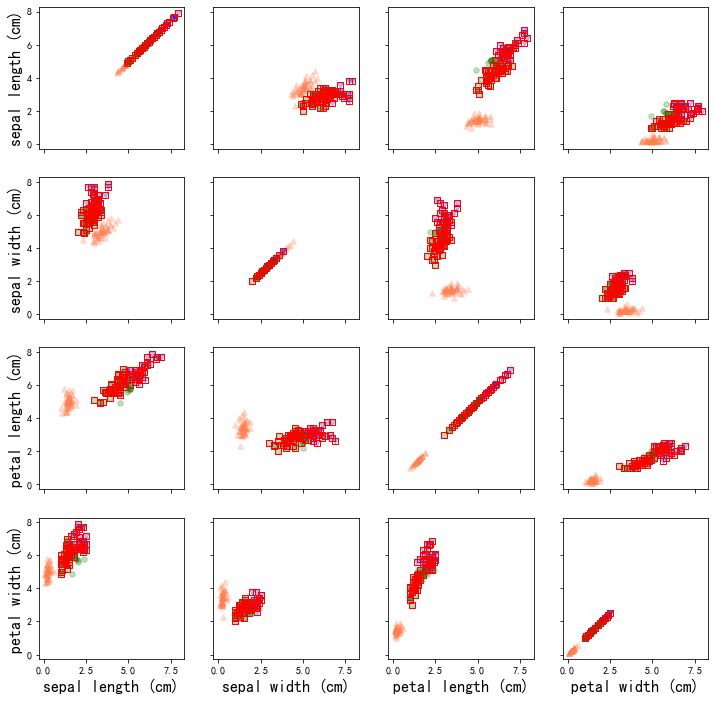

In [67]:
N = X.shape[1]
fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True,sharey=True)
colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask], s=30,
                               marker=markers[p], color=colors[p],
                               alpha=0.25)
        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n], s=30,
                               marker="s", edgecolor="red",
                               facecolor=(1,1,1,0))
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)